In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [28]:
sales=pd.read_csv('supermarket_sales.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,6/2/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,9/3/2019,17:03,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,11/3/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,886-18-2897,A,Yangon,Normal,Female,Food_and_beverages,56.56,5,14.140,296.940,3/22/2019,19:06,Credit card,282.80,4.761905,14.140,4.5
996,745-74-0715,A,Yangon,Normal,Male,Electronic_accessories,58.03,2,5.803,121.863,10/3/2019,20:46,Ewallet,116.06,4.761905,5.803,8.8
997,727-02-1313,A,Yangon,Member,Male,Food_and_beverages,31.84,1,1.592,33.432,9/2/2019,13:22,Cash,31.84,4.761905,1.592,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home_and_lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761905,3.291,4.1


In [29]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [30]:
df=pd.DataFrame({'Gender':sales['Gender'],'Total':sales['Total']})
df

,Gender,Total
0,Female,172.746
1,Female,60.816
2,Male,107.142
3,Female,590.436
4,Female,84.630
...,...,...
995,Female,296.940
996,Male,121.863
997,Male,33.432
998,Male,69.111


<AxesSubplot:>

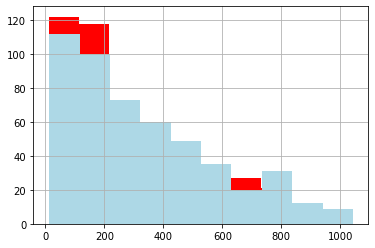

In [31]:
m=df.loc[df['Gender']=='Male']
mtot=m['Total']

f=df.loc[df['Gender']=='Female']
ftot=f['Total']

mtot.hist(color='red')
ftot.hist(color='lightblue')

# Hypotheisis



### H0: Male and Female customer Avg total are same.
### H1: Male average total is less that female.


In [32]:
df.groupby('Gender').mean()

,Total
Gender,
Female,335.095659
Male,310.789226


In [33]:
means=df.groupby('Gender').mean()

In [34]:
difference=means['Total'][0]-means['Total'][1]
observed_difference=difference
observed_difference

24.306432229728955

## single permutation

In [35]:
randomsamples=df.sample(1000,replace=False)
randomsamples

,Gender,Total
690,Male,362.9430
522,Female,1034.4600
822,Male,40.5300
388,Male,254.0160
691,Male,44.5935
...,...,...
208,Female,92.5575
598,Male,190.4805
705,Female,216.8460
460,Female,441.6930


In [36]:
original_shuffled=df.copy()
original_shuffled

,Gender,Total
0,Female,172.746
1,Female,60.816
2,Male,107.142
3,Female,590.436
4,Female,84.630
...,...,...
995,Female,296.940
996,Male,121.863
997,Male,33.432
998,Male,69.111


In [37]:
original_shuffled['shuffled']=randomsamples['Total'].values
original_shuffled

,Gender,Total,shuffled
0,Female,172.746,362.9430
1,Female,60.816,1034.4600
2,Male,107.142,40.5300
3,Female,590.436,254.0160
4,Female,84.630,44.5935
...,...,...,...
995,Female,296.940,92.5575
996,Male,121.863,190.4805
997,Male,33.432,216.8460
998,Male,69.111,441.6930


In [38]:
group_means= original_shuffled.groupby('Gender').mean()
group_means

,Total,shuffled
Gender,,
Female,335.095659,329.560293
Male,310.789226,316.346778


In [39]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

13.213515858063488

In [40]:
original = sales[['Customer type', 'Total']]
shuffled = original.sample(1000,replace = False)
shuffled_total = shuffled['Total']
original_shuffled = original.assign(shuffled_total=shuffled_total.values )
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled_total
Customer type,,
Member,327.791305,327.172371
Normal,318.122856,318.744271


### Multiple Permutations

In [41]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = sales[['Gender', 'Total']]
    shuffled = original.sample(1000,replace = False)
    shuffled_total = shuffled['Total']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('Gender').mean()
    difference = group_means['shuffled_total'][0]- group_means['shuffled_total'][1]
    differences[i] = difference

In [42]:
differences_df=pd.DataFrame(differences, columns = ['Difference'])
differences_df

,Difference
0,-14.674176
1,-14.664642
2,28.402079
3,6.657668
4,8.224064
...,...
4995,4.242910
4996,3.951261
4997,5.399133
4998,-23.013309


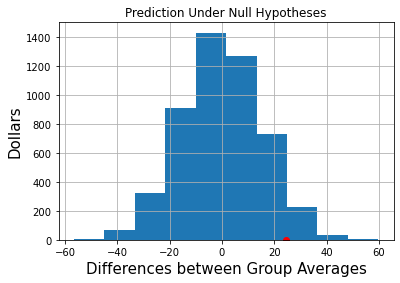

In [43]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

### The Observed diffence lies within the sample difference histogram.

In [44]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.943

### Emperical value is grater than p value is 0.05.hence Fail to reject the null hypotheisis.